# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Importing the datasets

In [2]:
dataset = pd.read_csv('combined1.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# Encoding Categorical Data

In [3]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')

In [4]:
X = np.array(ct.fit_transform(X))

# Splitting the dataset into the Training set and Test set


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Decision Tree Regression model on the Training set

In [47]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

# Predicting the Test set results

In [48]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 2.56  2.8 ]
 [ 0.66  0.6 ]
 [ 0.15 -0.5 ]
 [ 0.54  0.6 ]
 [ 2.94  5.2 ]
 [ 1.54  1.  ]]


# Evaluating the Model Performance

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7215834176836528

In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared = False)

0.9910949349078421

In [51]:
y_pred

array([2.56, 0.66, 0.15, 0.54, 2.94, 1.54])

In [52]:
y_test

array([ 2.8,  0.6, -0.5,  0.6,  5.2,  1. ])

In [53]:
X_test

array([[1.0, 0.0, 4.9, 4.5, 1.5, 1.8, 4490],
       [1.0, 0.0, 3.1, -2.1, 1.6, 2.0, 2790],
       [1.0, 0.0, 1.7, -14.3, 1.6, 2.0, 6280],
       [0.0, 1.0, 3.69, 46.0, 2.44, 3.25, 8900],
       [0.0, 1.0, 5.47, 94.1, 2.08, 2.58, 4430],
       [0.0, 1.0, 5.05, 118.5, 2.35, 3.02, 7260]], dtype=object)

In [127]:
value = list(range(len(y_test))) * 2
test = y_test.tolist()
pred = y_pred.tolist()
test.extend(pred)
data_type = ["test"] * len(y_test) + ["pred"] * len(y_test)


In [129]:
plot = pd.DataFrame(data = {"Value": value,
                           "Y" : test,
                           "Type" : data_type})

plot

,Value,Y,Type
0,0,2.8000,test
1,1,0.6000,test
2,2,-0.5000,test
3,3,0.6000,test
4,4,5.2000,test
5,5,1.0000,test
6,0,2.5590,pred
7,1,0.6553,pred
8,2,0.1538,pred
9,3,0.5368,pred


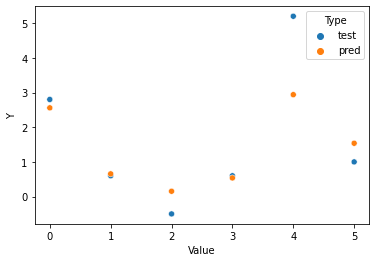

In [130]:
import seaborn as sns
sns.scatterplot(data=plot, x="Value", y="Y", hue="Type")
plt.show()